In [2]:
import pandas as pd

In [3]:
df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')

In [4]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [5]:
import sklearn

In [6]:
num_columns = len(df.columns)

print(f"Number of columns: {num_columns}")

Number of columns: 19


In [7]:
df['duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds()/60

std_duration = df['duration'].std()

print(f"Standard deviation: {std_duration} minutes")

Standard deviation: 42.594351241920904 minutes


In [8]:
filtered_df = df[(df['duration'] >= 1) & (df['duration'] <= 60)]
fraction_left = len(filtered_df) / len(df)
print(f"Fraction of records left after removing outliers: {fraction_left*100:.0f}%")

Fraction of records left after removing outliers: 98%


In [9]:
df = df[(df['duration'] >= 1) & (df['duration'] <= 60)]
categorical = ['PULocationID','DOLocationID']
df[categorical] = df[categorical].astype(str)

In [10]:
from sklearn.feature_extraction import DictVectorizer

In [11]:
train_dicts = df[categorical].to_dict(orient='records')
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [12]:
X_train

<3009173x515 sparse matrix of type '<class 'numpy.float64'>'
	with 6018346 stored elements in Compressed Sparse Row format>

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
y_train = df['duration'].values

In [15]:
y_train

array([ 8.43333333,  6.31666667, 12.75      , ..., 24.51666667,
       13.        , 14.4       ])

In [16]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred = lr.predict(X_train)

/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


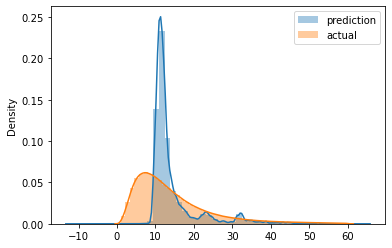

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

In [19]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train,y_pred, squared=False)

7.649261027826866

In [20]:
df_val = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet')
df_val['duration'] = (df_val['tpep_dropoff_datetime'] - df_val['tpep_pickup_datetime']).dt.total_seconds()/60
df_val[categorical] = df_val[categorical].astype(str)
val_dicts = df_val[categorical].to_dict(orient='records')
X_val = dv.transform(val_dicts)
y_val = df_val['duration'].values

y_pred = lr.predict(X_val)
mean_squared_error(y_val,y_pred, squared=False)

42.28477450732246